# DALL-E Print

This is a prototype application allowing the user to:
- Input a prompt
- Use that prompt to generate a number of images
- Either create variaions of the image or accept one of the provided ones
- Create a product using that image i.e. a tshirt, a cup etc.

This notebook contains the discovery steps before creating a working application

## Setup

- Import the packages you'll need
- Import your OpenAI API key
- Set a directory to save images to

In [1]:
# imports
import openai  # OpenAI Python library to make API calls
import requests  # used to download images
import os  # used to access filepaths
from PIL import Image  # used to print and edit images

# set API key
openai.api_key = os.environ.get("OPENAI_API_KEY")


In [2]:
# set image directory
image_dir = os.path.join(os.pardir,'images')

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f'''image_dir={image_dir}''')

image_dir=../images


## Generate Images

First we allow user to choose the following:
- Prompt for their image
- Number of images to generate
- Size of images (optional, defaults to 

In [65]:
# User inputs prompt
prompt=input()

An epic scene of a giant panda bear holding the world in its hands


In [66]:
# User chooses number of images
num_images = input()

3


In [67]:
# User chooses size
size_options = ['256x256'
           , '512x512'
           , '1024x1024']

In [68]:
# call the OpenAI API
generation_response = openai.Image.create(
    prompt=prompt,
    n=int(num_images),
    size="512x512",
    response_format="url",
)

# print response
print(generation_response)

{
  "created": 1670246141,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-awlen7mOqGKrCMw6Xvg8wbaA/user-j1br4tBS0R3YuX7HH6ulMcxY/img-JYcVBeMhHkAjulJFtM2pHOMv.png?st=2022-12-05T12%3A15%3A41Z&se=2022-12-05T14%3A15%3A41Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2022-12-05T11%3A55%3A44Z&ske=2022-12-06T11%3A55%3A44Z&sks=b&skv=2021-08-06&sig=VEa/QLt03iPNh4bcth3gxZQ2DYIDtz/ML8ejLIwL6WU%3D"
    },
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-awlen7mOqGKrCMw6Xvg8wbaA/user-j1br4tBS0R3YuX7HH6ulMcxY/img-nwySlTFmCVRRRLXqYN9aCy3q.png?st=2022-12-05T12%3A15%3A41Z&se=2022-12-05T14%3A15%3A41Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2022-12-05T11%3A55%3A44Z&ske=2022-12-06T11%3A55%3A44Z&sks=b&skv=2021-08-06&sig=K2xDj1gL0P/KKr

In [69]:
counter = 4
for image in generation_response['data']:
    
    counter += 1

    # save the image
    generated_image_name = f"generated_image_{counter}.png"  # any name you like; the filetype should be .png
    generated_image_filepath = os.path.join(image_dir, generated_image_name)
    generated_image_url = image["url"]  # extract image URL from response
    generated_image = requests.get(generated_image_url).content  # download the image

    with open(generated_image_filepath, "wb") as image_file:
        image_file.write(generated_image)  # write the image to the file


generated_image_1.png


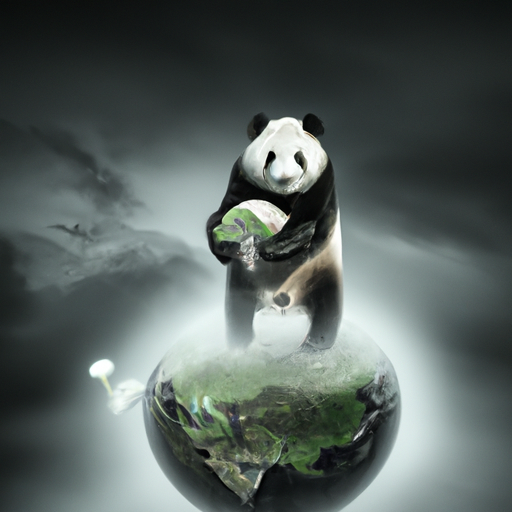

generated_image_2.png


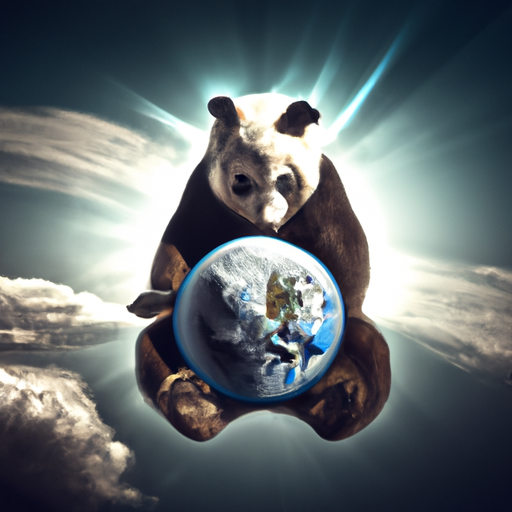

generated_image_3.png


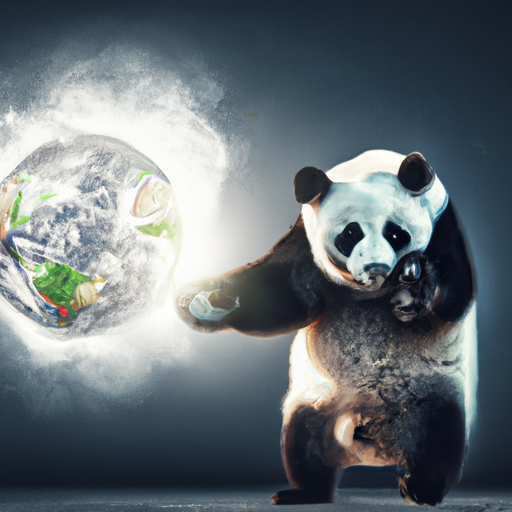

generated_image_5.png


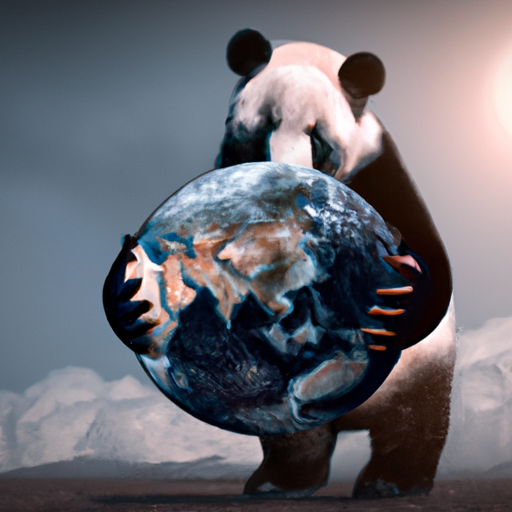

generated_image_6.png


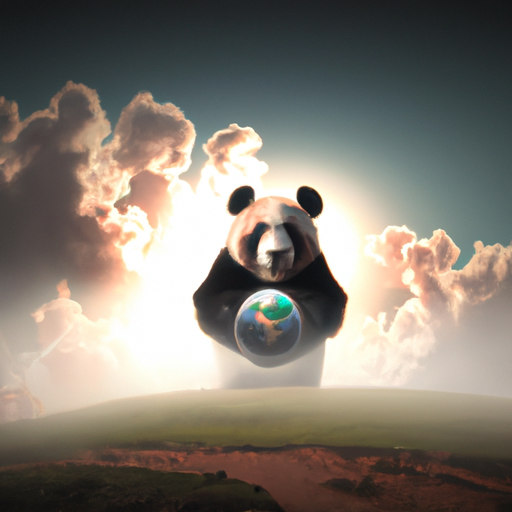

generated_image_7.png


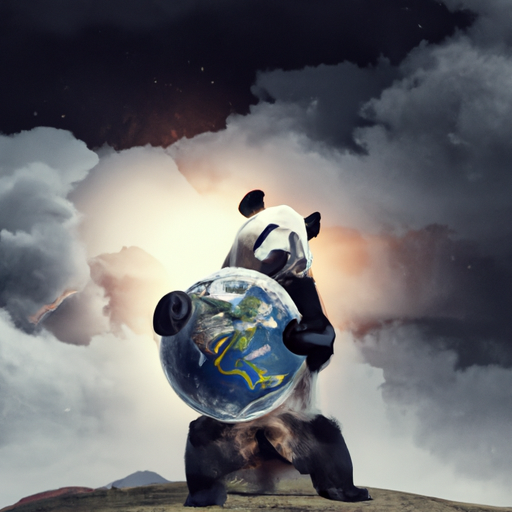

In [70]:
for image in sorted(os.listdir(image_dir)):
    
    print(image)
    display(Image.open(os.path.join(image_dir,image)))

## Order Fulfilment

Once the customer has settled on their design, we use Printful to create an order and send it

In [73]:
image_url = generation_response['data'][1]['url']

In [46]:
import requests

pf_url = 'https://api.printful.com/'

# Get API Key and create headers
pf_key = os.environ.get("PRINTFUL_API_KEY")
pf_headers = {
    'Authorization': f'Bearer {pf_key}'
}

### Get Store Details

In [47]:
response = requests.get(url='https://api.printful.com/stores',headers = pf_headers)

In [52]:
store_id = response.json()['result'][0]['id']
store_id

9310519

### Get Product Templates

In [49]:
template_response = requests.get(url='https://api.printful.com/product-templates',headers = pf_headers)
product_templates = template_response.json()['result']['items']
product_templates

[{'id': 37224943,
  'product_id': 162,
  'external_product_id': None,
  'title': 'Short sleeve t-shirt',
  'available_variant_ids': [6584,
   6585,
   6586,
   6587,
   6588,
   6608,
   6609,
   6610,
   6611,
   6612],
  'option_data': [{'id': 'text_thread_colors_front', 'value': []}],
  'colors': [{'color_name': 'Solid Black Triblend',
    'color_codes': ['#101211']},
   {'color_name': 'White Fleck Triblend', 'color_codes': ['#eaeaea']}],
  'sizes': ['XS', 'S', 'M', 'L', 'XL'],
  'mockup_file_url': 'https://files.cdn.printful.com/upload/product-templates/2f/2f92213e3f18d4a20f00ed22af398ef8_l',
  'placements': [{'placement': 'front',
    'display_name': 'Front print',
    'technique_key': 'DTG',
    'technique_display_name': 'DTG printing'}],
  'created_at': 1670237105,
  'updated_at': 1670237105,
  'placement_option_data': [{'type': 'front', 'options': []}]},
 {'id': 37224634,
  'product_id': 71,
  'external_product_id': None,
  'title': 'Product template example',
  'available_vari

### Make a new Product

We selected product variant 4011 from the above product template, so we'll be making a T-shirt from the image we chose above

In [93]:
sample_object = {
    "recipient": {
        "name": "C Fresh",
        "address1": "6 Boomtown Street",
        "city": "Glasgow",
        "country_code": "GB",
        "zip": "G71 7RY"
    },
    "items": [
        {
            "variant_id": 4011,
            "quantity": 1
        }
    ]
}

In [62]:
# Get placement options
variant_response = requests.get(url='https://api.printful.com/products/variant/4011',headers = prod_headers)
[(x['title'],x['type']) for x in variant_response.json()['result']['product']['files']]

[('Left chest', 'embroidery_chest_left'),
 ('Center chest', 'embroidery_chest_center'),
 ('Left sleeve top', 'embroidery_sleeve_left_top'),
 ('Right sleeve top', 'embroidery_sleeve_right_top'),
 ('Front print', 'front'),
 ('Back print', 'back'),
 ('Outside label', 'label_outside'),
 ('Inside label', 'label_inside'),
 ('Left sleeve', 'sleeve_left'),
 ('Right sleeve', 'sleeve_right'),
 ('Mockup', 'mockup')]

In [94]:
placement = {
    'files': [ {
        "type": "front",
        "url": image_url
            }
    ]
}    
sample_object['items'][0].update(placement)
sample_object

{'recipient': {'name': 'C Fresh',
  'address1': '6 Boomtown Street',
  'city': 'Glasgow',
  'country_code': 'GB',
  'zip': 'G71 7RY'},
 'items': [{'variant_id': 4011,
   'quantity': 1,
   'files': [{'type': 'front',
     'url': 'https://oaidalleapiprodscus.blob.core.windows.net/private/org-awlen7mOqGKrCMw6Xvg8wbaA/user-j1br4tBS0R3YuX7HH6ulMcxY/img-nwySlTFmCVRRRLXqYN9aCy3q.png?st=2022-12-05T12%3A15%3A41Z&se=2022-12-05T14%3A15%3A41Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2022-12-05T11%3A55%3A44Z&ske=2022-12-06T11%3A55%3A44Z&sks=b&skv=2021-08-06&sig=K2xDj1gL0P/KKrOZmTMS4i%2BB87y3RW1r6UCAcBXVhaw%3D'}]}]}

In [89]:
post_headers = {
    "Content-Type": "application/json",
    'Authorization': f'Bearer {pf_key}',
    'X-PF-Store-Id': str(store_id)
}

In [95]:
post_response = requests.post(url='https://api.printful.com/orders',headers = post_headers,json=sample_object)

In [96]:
post_response.json()

{'code': 200,
 'result': {'id': 85907132,
  'external_id': None,
  'store': 9310519,
  'status': 'draft',
  'error': None,
  'errorCode': 0,
  'shipping': 'STANDARD',
  'shipping_service_name': 'Flat Rate (2-5 business days after fulfillment)',
  'created': 1670246716,
  'updated': 1670246716,
  'recipient': {'name': 'C Fresh',
   'company': None,
   'address1': '6 Boomtown Street',
   'address2': None,
   'city': 'Glasgow',
   'state_code': None,
   'state_name': None,
   'country_code': 'GB',
   'country_name': 'United Kingdom',
   'zip': 'G71 7RY',
   'phone': None,
   'email': None,
   'tax_number': None},
  'notes': None,
  'incomplete_items': [],
  'is_sample': False,
  'needs_approval': False,
  'not_synced': False,
  'has_discontinued_items': False,
  'can_change_hold': False,
  'costs': {'currency': 'GBP',
   'subtotal': '10.95',
   'discount': '0.00',
   'shipping': '3.29',
   'digitization': '0.00',
   'additional_fee': '0.00',
   'fulfillment_fee': '0.00',
   'tax': '0.00',

## Scratchpad

In [3]:
openai.Model.list()

<OpenAIObject list at 0x7f88f0b12f50> JSON: {
  "data": [
    {
      "created": 1649358449,
      "id": "babbage",
      "object": "model",
      "owned_by": "openai",
      "parent": null,
      "permission": [
        {
          "allow_create_engine": false,
          "allow_fine_tuning": false,
          "allow_logprobs": true,
          "allow_sampling": true,
          "allow_search_indices": false,
          "allow_view": true,
          "created": 1669085501,
          "group": null,
          "id": "modelperm-49FUp5v084tBB49tC4z8LPH5",
          "is_blocking": false,
          "object": "model_permission",
          "organization": "*"
        }
      ],
      "root": "babbage"
    },
    {
      "created": 1649357491,
      "id": "ada",
      "object": "model",
      "owned_by": "openai",
      "parent": null,
      "permission": [
        {
          "allow_create_engine": false,
          "allow_fine_tuning": false,
          "allow_logprobs": true,
          "allow_sampli

In [9]:
test_prompt = '''You are an expert Python programmer. Generate me the code for a Flask app that provides a user interface where users 
can supply a text prompt and are shown pictures of what they typed'''

In [11]:
test_response = openai.Completion.create(engine="text-davinci-003", prompt=test_prompt, max_tokens=1000)

In [14]:
print(test_response['choices'][0]['text'])



from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/')
def index():
	# Render the page with a text box to enter text
    return render_template('index.html')

@app.route('/process', methods=['POST'])
def process():
	# Get the form data from the request
    text = request.form['text']
	
	# Generate a list of images that relate to the text
    images = generate_images(text)
	
	# Render the page with the list of images
    return render_template('process.html', images=images)

def generate_images(text):
	# ..
	return images

if __name__ == '__main__':
    app.run(debug=True)


In [15]:
added_prompt = '''Generate an index.html file that the Flask application below can use:

from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/')
def index():
	# Render the page with a text box to enter text
    return render_template('index.html')

@app.route('/process', methods=['POST'])
def process():
	# Get the form data from the request
    text = request.form['text']
	
	# Generate a list of images that relate to the text
    images = generate_images(text)
	
	# Render the page with the list of images
    return render_template('process.html', images=images)

def generate_images(text):
	# ..
	return images

if __name__ == '__main__':
    app.run(debug=True)'''

In [16]:
added_response = openai.Completion.create(engine="text-davinci-003", prompt=added_prompt, max_tokens=1000)

In [17]:
print(added_response['choices'][0]['text'])



<!-- index.html -->
<!DOCTYPE html>
<html>
<head>
  <title>Input Form</title>
</head>
<body>
  <h1>Input Form</h1>
  <form action="process" method="post">
    <input type="text" name="text" />
    <input type="submit" />
  </form>
</body>
</html>


In [92]:
country_response = requests.get(url='https://api.printful.com/countries',headers = prod_headers)
country_response.json()

{'code': 200,
 'result': [{'name': 'Andorra', 'code': 'AD', 'states': None},
  {'name': 'United Arab Emirates', 'code': 'AE', 'states': None},
  {'name': 'Afghanistan', 'code': 'AF', 'states': None},
  {'name': 'Antigua and Barbuda', 'code': 'AG', 'states': None},
  {'name': 'Anguilla', 'code': 'AI', 'states': None},
  {'name': 'Albania', 'code': 'AL', 'states': None},
  {'name': 'Armenia', 'code': 'AM', 'states': None},
  {'name': 'Netherlands Antilles', 'code': 'AN', 'states': None},
  {'name': 'Angola', 'code': 'AO', 'states': None},
  {'name': 'Antarctica', 'code': 'AQ', 'states': None},
  {'name': 'Argentina', 'code': 'AR', 'states': None},
  {'name': 'American Samoa', 'code': 'AS', 'states': None},
  {'name': 'Austria', 'code': 'AT', 'states': None},
  {'name': 'Australia',
   'code': 'AU',
   'states': [{'code': 'ACT', 'name': 'Australian Capital Territory'},
    {'code': 'NSW', 'name': 'New South Wales'},
    {'code': 'NT', 'name': 'Northern Territory'},
    {'code': 'QLD', 'na

In [34]:
product_response = requests.get(url='https://api.printful.com/store/products',headers = prod_headers)

In [36]:
product_response.json()

{'code': 200,
 'result': [{'id': 294238417,
   'external_id': '638dcc464af4a6',
   'name': "The world is in Panda's paws, short sleeve t-shirt",
   'variants': 10,
   'synced': 10,
   'thumbnail_url': 'https://files.cdn.printful.com/files/035/035d468a226d156dabf21d5f61a9b038_preview.png',
   'is_ignored': False}],
 'extra': [],
 'paging': {'total': 1, 'offset': 0, 'limit': 20}}

In [22]:
response = requests.get(url='https://api.printful.com/stores',headers = pf_headers)

In [24]:
store_id = response.json()['result'][0]['id']
store_id

9310519

## Get Variations

If the user chooses they can get variations of the files

In [41]:
selected_image = input()

1


In [42]:
sorted(os.listdir(image_dir))[int(selected_image)]

'generated_image_2.png'

In [44]:
# create variations

# call the OpenAI API, using `create_variation` rather than `create`
variation_response = openai.Image.create_variation(
    image=os.path.join(image_dir,sorted(os.listdir(image_dir))[int(selected_image)]),  # generated_image is the image generated above
    n=1,
    size="1024x1024",
    response_format="url",
)

# print response
print(variation_response)


InvalidRequestError: Uploaded image must be a PNG and less than 4 MB.